In [1]:
import os
import sys

sys.path.append("/home/yuri/github.com/AoesJP/project_pokereader")
sys.path

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import pickle
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import splprep, splev

In [3]:
from pokedex.edges import deformer, draw

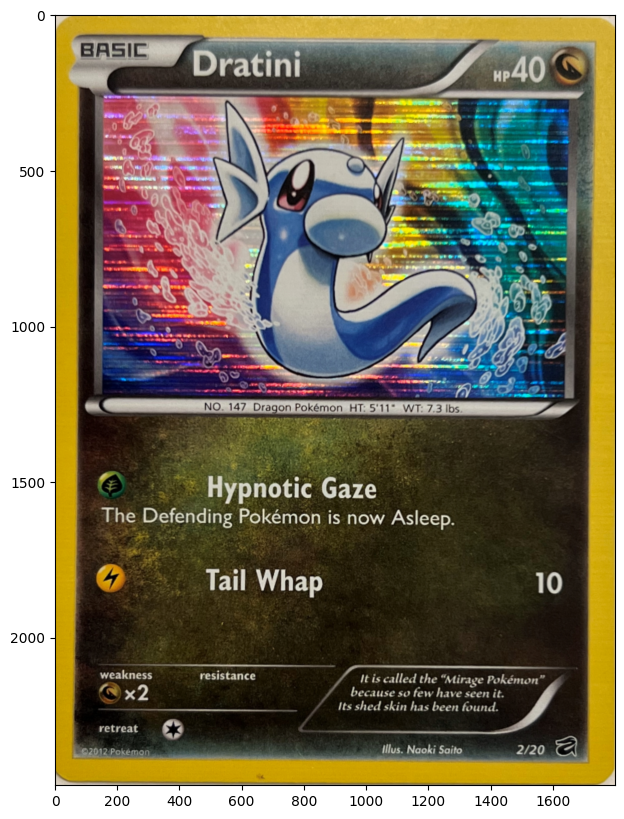

In [6]:
# img_path = "/home/yuri/github.com/AoesJP/project_pokereader/data/white_bg/IMG_1488.jpeg"
# img_path = "/home/yuri/github.com/AoesJP/project_pokereader/data/white_bg/IMG_1498.jpeg"
# img_path = "/home/yuri/github.com/AoesJP/project_pokereader/data/white_bg/swsh12pt5-62.jpg"
# img_path = "/home/yuri/github.com/AoesJP/project_pokereader/data/white_bg/dv1-2.jpg"
# img_path = "/home/yuri/github.com/AoesJP/project_pokereader/data/white_bg/charizard2.png"
# img_path = "/home/yuri/github.com/AoesJP/project_pokereader/data/white_bg/pika.jpeg"
img_path = "/home/yuri/github.com/AoesJP/project_pokereader/data/poke1.png"
# img_path = "/home/yuri/github.com/AoesJP/project_pokereader/data/poke2.png"
# img_path = "/home/yuri/github.com/AoesJP/project_pokereader/data/home/20240523_211006.jpg"
# img_path = "/home/yuri/github.com/AoesJP/project_pokereader/data/home/20240523_210824.jpg"
# img_path = "/home/yuri/github.com/AoesJP/project_pokereader/data/home/20240520_122513.jpg"
# img_path = "/home/yuri/github.com/AoesJP/project_pokereader/data/home/20240523_222811.jpg"
# img_path = "/home/yuri/github.com/AoesJP/project_pokereader/data/home/20240523_222803.jpg"
test_img = Image.open(img_path)
# plt.imshow(np.flip(np.array(test_img).transpose(1, 0, 2), axis=1))
# plt.imshow(np.array(test_img))
# img, deformed_img = deformer.deform_card(test_img)
deformed_img = deformer.deform_card(test_img)
# deformed_img = deformer.deform_card(img_path)
# draw.show_color(test_img)
draw.show_color(deformed_img)
# draw.draw_lines(img, deformed_img)

In [ ]:
img_orig = cv2.imread(img_path)
draw.show_color(img_orig)

In [ ]:
# MAX_EDGE_LENGTH = 1200
# orig_shape = img_orig.shape[:2]
# orig_max_len = max(orig_shape)
# resize_ratio = MAX_EDGE_LENGTH / orig_max_len
# orig_resized = cv2.resize(img_orig, (int(orig_shape[1] * resize_ratio), int(orig_shape[0] * resize_ratio)))
# plt.imshow(orig_resized)

In [ ]:
# a = cv2.GaussianBlur(orig_resized, ksize=(51, 51), sigmaX=0)
# a = deformer.mono_grad(a, 10)
# plt.imshow(a)

In [ ]:
# b = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# max_val = b.max()
# b = b * (255 / max_val)
# b = b.astype("uint8")
# b = deformer.apply_contrast(b)
# c = cv2.Canny(b, 50, 100)
# draw.show_grey(c)

In [ ]:
# a = deformer.mono_grad(orig_resized, 10)
# kernel = np.ones((13, 13), np.uint8)
# b = cv2.morphologyEx(a, cv2.MORPH_OPEN, kernel)
# b = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
# ret3, th3 = cv2.threshold(b, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# plt.imshow(th3, cmap="grey")

In [ ]:
loaded_img = cv2.imread(img_path)
loaded_shape = loaded_img.shape[:2]
max_length = max(loaded_shape)
MAX_EDGE_LENGTH = 1200
edge_scale_ratio = MAX_EDGE_LENGTH / max_length
# IMG_SIZE = (512, 512)
IMG_SIZE = (int(loaded_shape[1] * edge_scale_ratio), int(loaded_shape[0] * edge_scale_ratio))
img = deformer.resize_with_fill(cv2.cvtColor(loaded_img, cv2.COLOR_BGR2RGB), IMG_SIZE[0], IMG_SIZE[1])
draw.show_color(img)

In [ ]:
blurred_rgb = cv2.GaussianBlur(img, (9, 9), 0)
draw.show_channels(blurred_rgb)

In [ ]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# blurred_rgb = cv2.GaussianBlur(img, (9, 9), 0)
blurred_hsv = cv2.GaussianBlur(img_hsv, (9, 9), 0)
draw.show_channels(blurred_hsv)

In [ ]:
alpha = 1.4
beta = -40
img_r = deformer.apply_contrast(blurred_rgb[:, :, 0], alpha=alpha, beta=beta)
img_g = deformer.apply_contrast(blurred_rgb[:, :, 1], alpha=alpha, beta=beta)
img_b = deformer.apply_contrast(blurred_rgb[:, :, 2], alpha=alpha, beta=beta)
img_h = deformer.apply_contrast(blurred_hsv[:, :, 0], alpha=alpha, beta=beta)
img_s = deformer.apply_contrast(blurred_hsv[:, :, 1], alpha=alpha, beta=beta)
img_v = deformer.apply_contrast(blurred_hsv[:, :, 2], alpha=alpha, beta=beta)
draw.show_channels(np.stack([img_r, img_g, img_b], axis=2))

In [ ]:
draw.show_channels(np.stack([img_h, img_s, img_v], axis=2))

In [ ]:
plt.imshow(cv2.cvtColor(deformer.mono_grad(blurred_rgb, 3), cv2.COLOR_BGR2GRAY), cmap="grey")

In [ ]:
edge_mono = cv2.cvtColor(deformer.mono_grad(blurred_rgb, 3), cv2.COLOR_BGR2GRAY)

In [ ]:
edger = cv2.Canny(img_r, 50, 100)
edgeg = cv2.Canny(img_g, 50, 100)
edgeb = cv2.Canny(img_b, 50, 100)
edge1 = cv2.Canny(img_h, 50, 100)
edge2 = cv2.Canny(img_s, 50, 100)
edge3 = cv2.Canny(img_v, 50, 100)

In [ ]:
draw.show_channels(np.stack([edger, edgeg, edgeb, edge1, edge2, edge3], axis=2))

In [ ]:
# edge_all = cv2.max(cv2.max(edge1, edge2), edge3)

# draw.show_grey(edge_all)

In [ ]:
contours_all = []
contours, hierarchy = cv2.findContours(edger, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)
contours_all.extend(list(deformer.remove_short_long_contours(contours, IMG_SIZE, min_length=300)))
contours, hierarchy = cv2.findContours(edgeg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)
contours_all.extend(list(deformer.remove_short_long_contours(contours, IMG_SIZE, min_length=300)))
contours, hierarchy = cv2.findContours(edgeb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)
contours_all.extend(list(deformer.remove_short_long_contours(contours, IMG_SIZE, min_length=300)))
contours, hierarchy = cv2.findContours(edge1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)
contours_all.extend(list(deformer.remove_short_long_contours(contours, IMG_SIZE, min_length=300)))
contours, hierarchy = cv2.findContours(edge2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)
contours_all.extend(list(deformer.remove_short_long_contours(contours, IMG_SIZE, min_length=300)))
contours, hierarchy = cv2.findContours(edge3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)
contours_all.extend(list(deformer.remove_short_long_contours(contours, IMG_SIZE, min_length=300)))
contours, hierarchy = cv2.findContours(edge_mono, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)
contours_all.extend(list(deformer.remove_short_long_contours(contours, IMG_SIZE, min_length=300)))
draw.draw_contours(img, contours_all)

In [ ]:
# contours, hierarchy = cv2.findContours(edge_all, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)
# list(contours)

In [ ]:
contours = contours_all

In [ ]:
cnt_smoothed = deformer.smooth_contours(contours)
draw.draw_contours(img, cnt_smoothed)

In [ ]:
# cnt_smoothed_cleaned = deformer.remove_short_long_contours(cnt_smoothed)
found_contours = deformer.find_rectangle_contours(cnt_smoothed, deformer.base_contour)
if not len(found_contours) > 0:
    deformer.logger.warning("No contour was found. Exiting.")

best_fit_contour = found_contours[0][0]
draw.draw_contour(img, best_fit_contour)

In [ ]:
len(found_contours)

In [ ]:
best_fit_contour = deformer.reset_orientation(best_fit_contour)

In [ ]:
best_fit_contour = deformer.remove_flat_points(best_fit_contour, threshold=2)
draw.draw_contour(img, best_fit_contour)

In [ ]:
def remove_protrude(img: np.ndarray, contour: np.ndarray, margin: int = 3):
    img_mask = np.zeros_like(img[:, :, 0])
    cv2.drawContours(img_mask, [best_fit_contour], -1, (255), thickness=cv2.FILLED)
    kernel = np.ones((2 * margin + 1, 2 * margin + 1), np.uint8)
    img_mask = cv2.erode(img_mask, kernel, iterations=1)
    img_mask = cv2.dilate(img_mask, kernel, iterations=2)
    img_shape = img_mask.shape

    ctr = contour.squeeze()
    ctr = ctr[(ctr[:, 0] >= 0) & (ctr[:, 0] <= img_shape[1]) & (ctr[:, 1] >= 0) & (ctr[:, 1] <= img_shape[0])]
    return np.expand_dims(ctr[img_mask[ctr[:, 1], ctr[:, 0]] > 0], axis=1)

In [ ]:
best_fit_contour = remove_protrude(img, best_fit_contour)
draw.draw_contour(img, best_fit_contour)

In [ ]:
contour_image = np.zeros_like(img[:, :, 0])
plt.imshow(cv2.drawContours(contour_image, [best_fit_contour], -1, (255), 1))

In [ ]:
lines = cv2.HoughLines(contour_image, 1, np.pi / 180, 100)
lines

In [ ]:
def calc_lines(lines: np.ndarray) -> np.ndarray:
    lines = lines.squeeze()
    new_lines = []
    for rho, theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        c = -rho
        new_lines.append([a, b, c])

    return np.array(new_lines, dtype="float32")

In [ ]:
new_lines = calc_lines(lines)
new_lines

In [ ]:
def find_intersection(a: tuple, b: tuple):
    a1, b1, c1 = a[0], a[1], a[2]
    a2, b2, c2 = b[0], b[1], b[2]
    A = np.array([[a1, b1], [a2, b2]])
    B = np.array([-c1, -c2])

    try:
        intersection_point = np.linalg.solve(A, B)
        return intersection_point
    except np.linalg.LinAlgError:
        raise ValueError("The lines are parallel and do not intersect.")

In [ ]:
def draw_lines(img: np.ndarray, lines: np.ndarray):
    img_copy = img.copy()
    for line in lines:
        a, b, c = line
        x0 = -a * c
        y0 = -b * c
        x1 = int(x0 + 2000 * (-b))
        y1 = int(y0 + 2000 * (a))
        x2 = int(x0 - 2000 * (-b))
        y2 = int(y0 - 2000 * (a))
        cv2.line(img_copy, (x1, y1), (x2, y2), (255, 0, 255), 2)
    plt.imshow(img_copy)

In [ ]:
draw_lines(img, new_lines)

In [ ]:
main_a, main_b, main_x, main_y = cv2.fitLine(best_fit_contour, cv2.DIST_L2, 0, 0.01, 0.01)
main_inter = main_b[0] / main_a[0]
main_inter
# sub_inter = -1 / main_inter
# x1 = main_x[0]
# x2 = main_x[0] + 100
# y1 = main_y[0]
# y2 = y1 + x2 * main_inter
# sub_x2 = main_x[0] + 1000
# sub_y2 = y1 + sub_x2 * sub_inter
# # lefty = int((-x*vy/vx) + y)
# # righty = int(((cols-x)*vy/vx)+y)
# x1, y1, x2, y2
# img_copy = img.copy()
# cv2.line(img_copy, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
# # cv2.line(img_copy, (int(x1), int(y1)), (int(sub_x2), int(sub_y2)), (0, 255, 0), 2)
# plt.imshow(img_copy)

In [ ]:
def line_equation(slope, point):
    m = slope
    x1, y1 = point
    a = m
    b = -1
    c = y1 - m * x1

    return a, b, c

In [ ]:
vx, vy, x, y = cv2.fitLine(best_fit_contour, cv2.DIST_L2, 0, 0.01, 0.01)
line_equation(vy[0] / vx[0], (x[0], y[0]))

In [ ]:
def get_corners_from_lines(lines: list[np.ndarray], contour: np.ndarray):
    def line_equation(slope, point):
        m = slope
        x1, y1 = point
        a = m
        b = -1
        c = y1 - m * x1

        return a, b, c

    lines_r = []
    lines_l = []
    lines_t = []
    lines_b = []

    vx, vy, x, y = cv2.fitLine(contour, cv2.DIST_L2, 0, 0.01, 0.01)

    # main_inter = main_b[0] / main_a[0]
    # sub_inter = -1 / main_inter

    main_d = np.array((vy[0], vx[0])) / np.linalg.norm((vy[0], vx[0]), ord=2)
    sub_d = np.array((vx[0], -vy[0])) / np.linalg.norm((vx[0], -vy[0]), ord=2)
    main_a, main_b, main_c = line_equation(vy[0] / vx[0], (x[0], y[0]))
    sub_a, sub_b, sub_c = line_equation(sub_d[0] / sub_d[1], (x[0], y[0]))
    # print(main_a, main_b, main_c)
    # print(sub_a, sub_b, sub_c)

    center = contour.squeeze().mean(axis=0)

    for line in lines:
        a, b, c = line
        # lines_r.append(val_x)

        line_d = np.array((a, -b)) / np.linalg.norm((a, -b))
        # val_x = a * center[0] + b * center[1] + c

        dot_prd = np.dot(line_d, main_d)
        if abs(dot_prd) > 0.5:  # Vertical Lines
            intersect = find_intersection((sub_a, sub_b, sub_c), (a, b, c))
            if intersect[0] < center[0]:  # Left
                print("Left")
                lines_l.append(line)
            else:  # Right
                print("Right")
                lines_r.append(line)
        else:
            intersect = find_intersection((main_a, main_b, main_c), (a, b, c))
            if intersect[1] < center[1]:
                print("Top")
                lines_t.append(line)
            else:
                print("Bottom")
                lines_b.append(line)

    line_l = lines_l[0]
    line_r = lines_r[0]
    line_t = lines_t[0]
    line_b = lines_b[0]

    pt_tl = find_intersection(line_l, line_t)
    pt_tr = find_intersection(line_r, line_t)
    pt_bl = find_intersection(line_l, line_b)
    pt_br = find_intersection(line_r, line_b)

    return pt_tl, pt_tr, pt_br, pt_bl

In [ ]:
center = best_fit_contour.squeeze().mean(axis=0)
center

In [ ]:
best_fit_contour

In [ ]:
new_lines

In [ ]:
# line_id = 6
line_id = 5
# draw_lines(img, new_lines[line_id : line_id + 1])
draw_lines(img, new_lines)
# lines_r = get_corners_from_lines(new_lines[line_id : line_id + 1], best_fit_contour)
pts = get_corners_from_lines(new_lines, best_fit_contour)
pts

# draw_lines(img, [lines_r[0]])

In [ ]:
img_copy = img.copy()
plt.imshow(deformer.deform_img_to_card_from_pt(img_copy, pts, IMG_SIZE))

In [ ]:
img_copy = img.copy()
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 2000 * (-b))
        y1 = int(y0 + 2000 * (a))
        x2 = int(x0 - 2000 * (-b))
        y2 = int(y0 - 2000 * (a))
        cv2.line(img_copy, (x1, y1), (x2, y2), (0, 0, 255), 2)
plt.imshow(img_copy)

In [ ]:
best_fit_contour = deformer.get_corners_from_contour(best_fit_contour)
draw.draw_contour(img, best_fit_contour)